In [2]:
from numpy.random import normal
from numpy.random import binomial
import numpy as np
from ridgeplot import ridgeplot
import pydamage
import pandas as pd
import matplotlib.pyplot as plt
from joypy import joyplot

In [31]:
%matplotlib inline

In [15]:
seqlen=15
x = np.arange(0, seqlen, 1)
p = 0.5
pmax=0.3
pmin=0.01
ancient_model = pydamage.models.damage_model()
damage_amount = ancient_model.fit(x, p, pmin, pmax, wlen=seqlen)

In [16]:
damage_amount

array([0.3       , 0.15499115, 0.08248672, 0.04623451, 0.02810841,
       0.01904535, 0.01451383, 0.01224806, 0.01111518, 0.01054874,
       0.01026552, 0.01012391, 0.0100531 , 0.0100177 , 0.01      ])

In [44]:
synthetic_samples = [binomial(100, p, 500)/100 for p in damage_amount]
df = pd.DataFrame(synthetic_samples).transpose().melt(var_name='position', value_name='frequency')

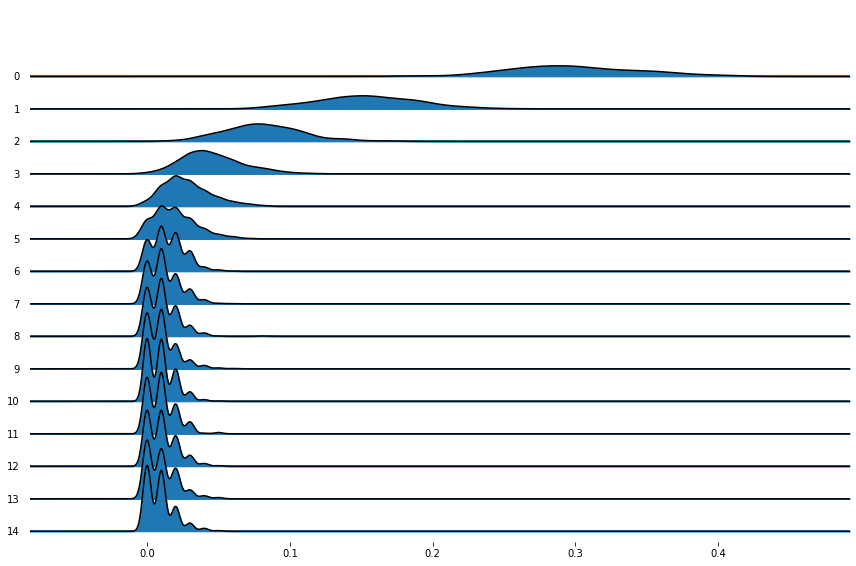

In [51]:
joyplot(
    data=df[['frequency', 'position']], 
    by='position',
    figsize=(12, 8),
)
plt.savefig("ridgeplot.png", dpi=300)

In [3]:
seqlen=15
x = np.arange(0, seqlen, 1)
p0=0.02
ancient_model = pydamage.models.null_model()
damage_amount = ancient_model.fit(x, p0)

In [5]:
synthetic_samples = [binomial(100, p, 500)/100 for p in damage_amount]
df = pd.DataFrame(synthetic_samples).transpose().melt(var_name='position', value_name='frequency')

In [6]:
joyplot(
    data=df[['frequency', 'position']], 
    by='position',
    figsize=(12, 8),
)
plt.savefig("ridgeplot_uniform.png", dpi=300)